<a href="https://colab.research.google.com/github/lcbjrrr/fiap-bdt-ml/blob/master/Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabalho Final da disciplina Big Data Mining & Inteligencia Artificial**

Aline Aparecida da Silva RM: 334112

Rodrigo Massahiro Sato RM: 304020

**Desempenho de Estudantes em Exames** ( Apenas colégios dos EUA )

https://www.kaggle.com/spscientist/students-performance-in-exams

A partir de uma base de desempenho de estudantes colegiais nos EUA em provas de Matemática, Escrita e Leitura, criamos 2 modelos de classificação para prever a aprovação dos alunos baseada nas seguintes variáveis: Sexo, Almoço, Preparação, Etnia e Grau de Escolaridade dos Pais.

---

Estrutura:

Nota_Matemática

Nota_Leitura

Nota_Escrita

Aprovado ( 0-Aluno reprovado/1-Aluno aprovado )

Sexo ( 0-Masculino/1-Feminino )

Almoco ( 0-Não almoça regularmente/1-Almoça regularmente )

Preparacao( 0-Aluno não se preparou/1-Aluno se preparou )

Etnia( 1-Grupo A/2-Grupo B/3-Grupo C/4-Grupo D/5-Grupo E )

Grau_Escolaridade_Pais( 1-Colégio sem diploma/2-Colégio com diploma/3-Faculdade sem diploma/4-Faculdade com diploma/5-Bacharel/6-Mestrado )

**Supervisionado**

**Algorítmos de Classificação: KNN e Árvore de Decisão**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

**1 - KNN**

In [0]:
#Importa base de Estudantes
import pandas as pd
aprovado = pd.read_csv("/content/drive/My Drive/PROJ/Aprovado.csv",delimiter=';')
aprovado.head()

,Nota_Matematica,Nota_Leitura,Nota_Escrita,Aprovado,Sexo,Almoco,Preparacao,Etnia,Grau_Escolaridade_Pais
0,72,72,74,1,0,1,0,2,5
1,69,90,88,1,0,1,1,3,3
2,90,95,93,1,0,1,0,2,6
3,47,57,44,0,1,0,0,1,4
4,76,78,75,1,1,1,0,3,3


In [0]:
#Importa Classificacao de Vizinhos da biblioteca sklearn
from sklearn.neighbors import KNeighborsClassifier
#Importa Divisão de Base para criar base treino e base teste
from sklearn.model_selection import train_test_split

#cria base de treino e base de teste
treino_dados, teste_dados = train_test_split(aprovado, test_size=0.25) # 75% para treino e 25% para teste

#Aplica Classificação e realiza treinamento do modelo utilizando base de treino
kviz = KNeighborsClassifier(n_neighbors=2)
kviz.fit(treino_dados[['Sexo',	'Almoco',	'Preparacao' ,'Etnia', 'Grau_Escolaridade_Pais']] , treino_dados['Aprovado'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [0]:
#Cria DataFrame, testa 2 exemplos com o modelo criado e verifica o resultado
novos_dados = pd.DataFrame({
    'Sexo':[1,0],
    'Almoco':[1,0],
    'Preparacao':[1,0],
    'Etnia':[3,2],
    'Grau_Escolaridade_Pais':[4,4],
})

kviz.predict(novos_dados)

array([1, 0])

In [0]:
#Utiliza base de teste para aplicação do modelo criado
pred = kviz.predict(teste_dados[['Sexo',	'Almoco',	'Preparacao' ,'Etnia', 'Grau_Escolaridade_Pais']])
pred


array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1])

In [0]:
#Adiciona nova coluna (Previsao) para validar resultado do modelo
teste_dados['Previsao']=kviz.predict(teste_dados[['Sexo',	'Almoco',	'Preparacao' ,'Etnia', 'Grau_Escolaridade_Pais']])
teste_dados

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Nota_Matematica,Nota_Leitura,Nota_Escrita,Aprovado,Sexo,Almoco,Preparacao,Etnia,Grau_Escolaridade_Pais,Verifica,Previsao
725,81,74,71,1,1,1,1,5,3,1,1
392,76,67,67,0,1,1,0,5,3,0,0
670,66,76,68,0,0,0,0,3,2,0,0
635,71,74,64,0,1,1,0,1,2,0,0
206,82,62,62,0,1,1,0,5,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
428,65,59,53,0,1,0,0,1,1,0,0
70,58,63,73,0,0,0,1,4,3,1,1
935,70,63,58,0,1,0,0,4,3,0,0
203,57,69,68,0,0,1,0,2,4,0,0


In [0]:
#Exporta Excel
#!pip install openpyxl
#teste_dados.to_excel('/content/drive/My Drive/PROJ/Aprovado_Valida.xlsx', sheet_name='Plan1', index = False)
teste_dados.to_excel('Aprovado_Valida.xlsx', sheet_name='Plan1', index = False)



Análise: Após aplicar o algoritmo de Classificação KNN para prever a aprovação de estudantes de colégios dos EUA em provas de matemática, leitura e escrita, conseguimos os seguintes resultados:

**Acurácia: 58%**

**Precisão: 62%**

**Revocação: 30%**

**2 - Árvore de Decisão**

In [0]:
!pip install graphviz

In [0]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
#Importa Classificacao de Arvore de Decisao da biblioteca sklearn
from sklearn.tree import DecisionTreeClassifier
desempenho = pd.read_csv('/content/drive/My Drive/PROJ/Aprovado.csv',delimiter=';')

#Define quantidade de níveis da árvore e realiza treino da base
arv = DecisionTreeClassifier (max_depth=2)
arv.fit (desempenho [['Sexo','Almoco','Preparacao','Etnia','Grau_Escolaridade_Pais']],desempenho ['Aprovado'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

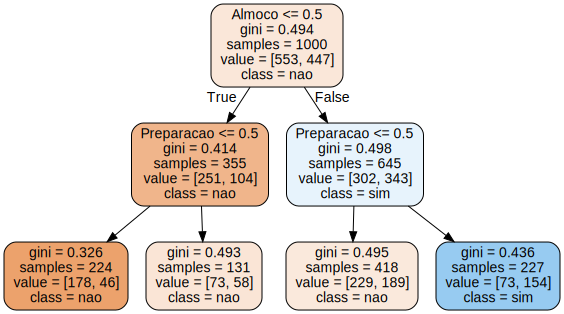

In [0]:
from sklearn.tree import export_graphviz
from graphviz import Source
dot_data = export_graphviz (arv,out_file=None,
                            filled = True, rounded = True,
                            feature_names = ['Sexo','Almoco','Preparacao','Etnia','Grau_Escolaridade_Pais'],
                            class_names =  ['nao', 'sim'])
grafico= Source (dot_data)
grafico

**Análise:** Considerando a ávore de decisão é possivel verificar que tirando as notas que é um item diretamente relacionado com a aprovação, a variável com maior impacto na aprovação dos alunos é se alimentar de maneira adequada, na sequência temos a variável de preparação sendo que os que se preparam tem uma maior probabilidade de serem aprovados